# Logistic Regression

In [1]:
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
matplotlib.style.use('bmh')
matplotlib.rcParams['figure.figsize']=(10,7)

### Logistic function


# $f(x)={\frac {1}{1+e^{-x}}}.$ 

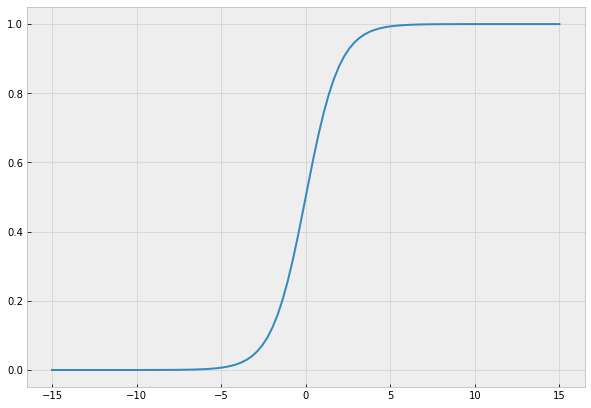

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.linspace(-15,15,100)
plt.plot(x, sigmoid(x));

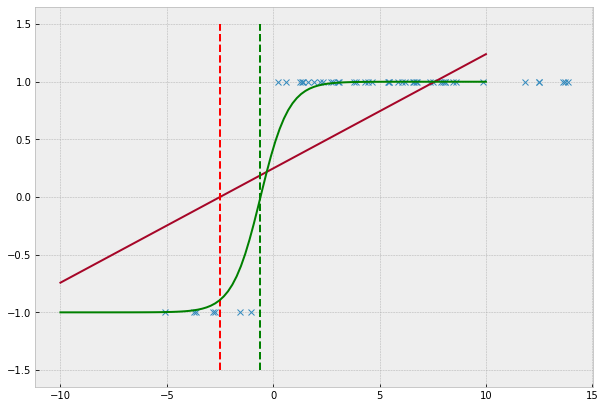

In [34]:
X = np.random.normal(5, 5, size=(50,1))
y0 = X[:,0]>0
y = y0.ravel()*2-1

# linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)
test_X=np.linspace(-10,10,100).reshape(-1,1)
plt.plot(X, y, 'x');
plt.plot(test_X, regr.predict(test_X))
plt.plot([-regr.intercept_/regr.coef_[0]]*2, [-1.5,1.5], 'r--')


# logistic regression
clf = linear_model.LogisticRegression()
clf.fit(X,y)
plt.plot(test_X, 2*sigmoid(test_X @ clf.coef_ +clf.intercept_)-1, 'g');
plt.plot([-clf.intercept_/clf.coef_[0]]*2, [-1.5,1.5], 'g--');

Logistic regression experiment



Use Iris dataset https://en.wikipedia.org/wiki/Iris_flower_data_set

In [58]:
l = np.array([1, 2])
x, y = l
f'{x=}, {y=}'

'x=1, y=2'

In [64]:
from rich import print
print(grid[1])

[[1.2        1.22110553 1.24221106 ... 5.35778894 5.37889447 5.4       ]
 [1.2        1.22110553 1.24221106 ... 5.35778894 5.37889447 5.4       ]
 [1.2        1.22110553 1.24221106 ... 5.35778894 5.37889447 5.4       ]
 ...
 [1.2        1.22110553 1.24221106 ... 5.35778894 5.37889447 5.4       ]
 [1.2        1.22110553 1.24221106 ... 5.35778894 5.37889447 5.4       ]
 [1.2        1.22110553 1.24221106 ... 5.35778894 5.37889447 5.4       ]]

In [65]:
print(grid.reshape(2, -1).T)

[[3.3        1.2       ]
 [3.3        1.22110553]
 [3.3        1.24221106]
 ...
 [8.9        5.35778894]
 [8.9        5.37889447]
 [8.9        5.4       ]]

In [70]:
np.any(Z==0)

False

C:\Users\tzerj\AppData\Local\Temp\ipykernel_17976\3634551000.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.05)


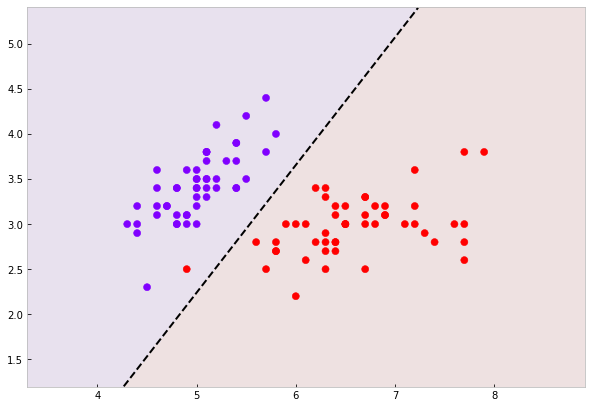

In [85]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# use only y=0,2 (for doing binary classification) and first two features of X (easier for visualization)
X = X[y!=1, :2]
y = y[y!=1]
clf = linear_model.LogisticRegression()
clf.fit(X, y)

# boundary
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# mesh grid
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# compute logistic prediction on grid points
Z = clf.decision_function(grid.reshape(2, -1).T)
Z  = Z.reshape(grid.shape[1:])

# plot color and boundary
plt.pcolormesh(grid[0], grid[1], Z > 0, cmap=plt.cm.rainbow, alpha=0.05)
plt.contour(grid[0], grid[1], Z, colors=['k'], linestyles=['--'],
                levels=[0])

# lable the sample points
plt.scatter(X[:,0], X[:, 1],  c=y, cmap=plt.cm.rainbow, zorder=10, s=50);


## Q
* different settings

In [102]:
linear_model.LogisticRegression?

Init signature:
linear_model.LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matr

### Multi class

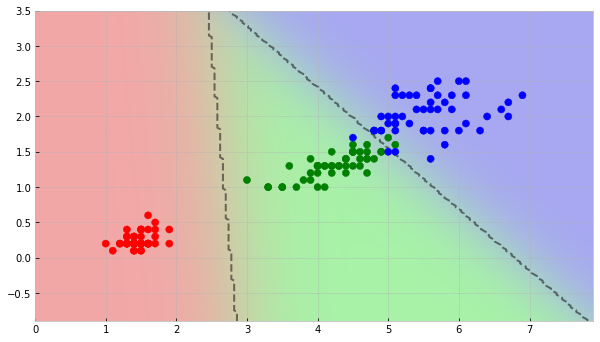

In [101]:
# Iris dataset
X, y = datasets.load_iris(return_X_y=True)
# 只取兩個 features
X = X[:, [2,3]]

clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
clf.fit(X, y)

# 邊界
x_min, y_min = X.min(axis=0)-1
x_max, y_max = X.max(axis=0)+1

# 座標點
grid  = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
# grid.shape = (2, 200, 200)

# 在座標點 算出 logistic 的預測機率
Z = clf.predict_proba(grid.reshape(2, -1).T)
# 圖片
Z  = Z.reshape(200, 200, 3)

# 畫出顏色和邊界
plt.imshow(Z.swapaxes(0,1)[::-1, :], extent=(x_min, x_max, y_min, y_max), alpha=0.3)
plt.contour(grid[0], grid[1], Z.argmax(axis=2), 
            colors=['k','k','k'], linestyles=['--'],levels=[0,1,2], alpha=0.5)

# 標出 sample 點
plt.scatter(X[:,0], X[:, 1],  c=["rgb"[i] for i in y], zorder=10, s=50);

## MNIST

In [106]:
import gzip
import pickle
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
    
train_X, train_y = train_set
test_X, test_y = test_set


In [107]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [108]:
%%timeit -n 1 -r 1
clf.fit(train_X, train_y)

14.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


C:\Users\tzerj\anaconda3\envs\dsclass\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(train_X) == train_y))

0.9342

210 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [110]:
%%timeit -n 1 -r 1
print(np.mean(clf.predict(test_X) == test_y))

0.9254

67.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Q
* `multi_class ="ovr"`

### Apply a random nonlinear transform
Extreme learning machine

In [118]:
random_matrix = np.random.uniform(-1, 1,size=[784, 4096])

In [119]:
clf = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
train_X2 = np.tanh(train_X@random_matrix)
clf.fit(train_X2, train_y)

C:\Users\tzerj\anaconda3\envs\dsclass\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [120]:
print(np.mean(clf.predict(train_X2) == train_y))

1.0

In [121]:
test_X2 = np.tanh(test_X@random_matrix)
print(np.mean(clf.predict(test_X2) == test_y))

0.968